In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# PCA (principal component analysis - 주성분 분석)

### 주성분 : 데이터에서의 주된 분산의 방향으로 일반적으로 feature 개수 만큼 존재한다.
#### 아래 그림에서 두개의 화살표가 각각 주성분이다.

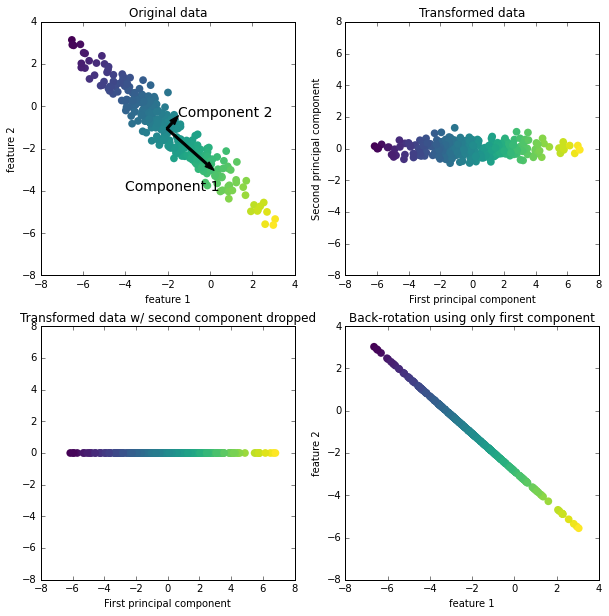

In [4]:
# 첫번째 주성분만 남기고 두번째 주성분은 제외한다.
mglearn.plots.plot_pca_illustration()

In [5]:
# feature 의 개수가 너무 많아 각각의 상관관계를 분석하기 어려운 경우
# 분류 문제일 경우 feature 별로 어떤 데이터가 어떤 class로 분류되는지 히스토그램을 그릴 수 있다.

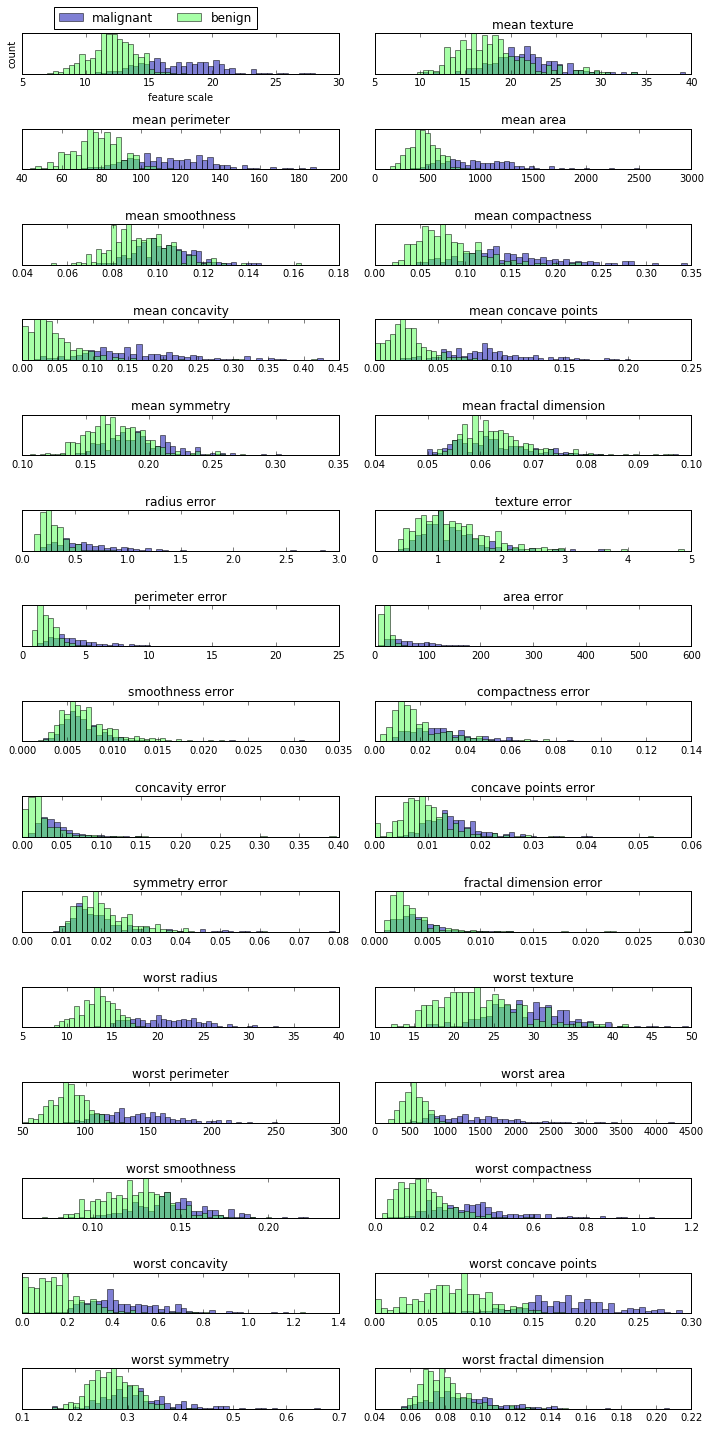

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

for i, ax in enumerate(axes.ravel()) :
    # 히스토그램의 각각의 구간이 같아 질 수 있도록 한다.
    _,bins = np.histogram(cancer.data[:,i], bins = 50)
    ax.hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha=0.5)
    ax.hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha=0.5)
    ax.set_title(cancer.feature_names[i])
    ax.set_yticks(())
axes[0][0].set_xlabel("feature scale")
axes[0][0].set_ylabel("count")
axes[0][0].legend(["malignant", "benign"], loc = (0.1, 1.1), ncol = 2)
fig.tight_layout()
    


### 위 그래프는 각각의 특성과 분류 결과의 관계를 파악하는데는 유용하나
### 특성간의 관계는 알 수 없다. 
### 이때 PCA 를 사용하면 도움이 된다.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터의 형태 :", X_scaled.shape)
print("축소된 데이터의 형태 : ", X_pca.shape)

원본 데이터의 형태 : (569, 30)
축소된 데이터의 형태 :  (569, 2)


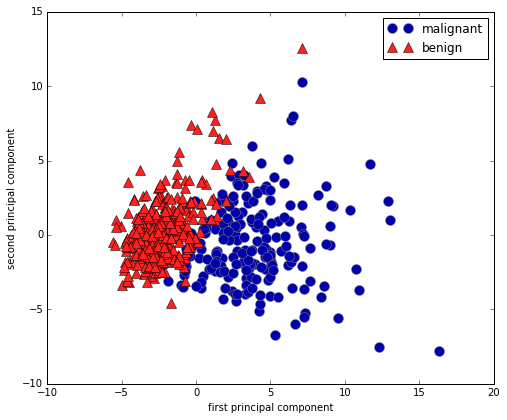

In [29]:
# 주성분 2개로 분해해도 데이터가 잘 구분됨을 확인할 수 있다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target, c=mglearn.cm2.colors)
plt.legend(["malignant","benign"], loc = 'best')
plt.gca().set_aspect("equal")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [30]:
# pca.components_ 에 주성분이 행별로 크기순으로 저장되어있다. 각 열은 특성에 대응하는 값이다.
print("pca.components_ shape : ", pca.components_.shape)


pca.components_ shape :  (2, 30)


In [31]:
print("pca.components : \n", pca.components_)

pca.components : 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


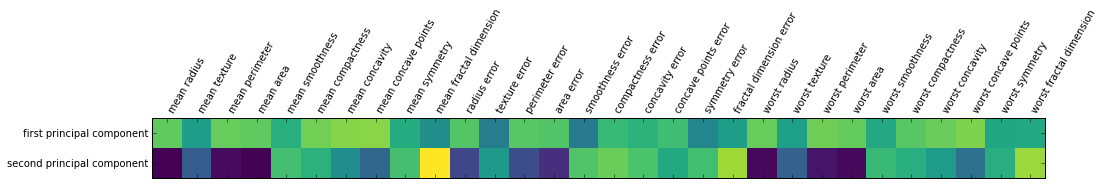

In [37]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['first principal component', 'second principal component'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.show()